In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble, linear_model,svm,neighbors,neural_network
from sklearn.metrics import (classification_report,confusion_matrix,
                             accuracy_score,auc,mean_absolute_error,r2_score,mean_squared_error,
                             plot_roc_curve,roc_auc_score,roc_curve)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Data.csv")

In [ ]:
df.head()

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,sub_segment,Product Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,province,Discount_Total
0,29000310,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,29000419,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,Liège,0.00
2,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


In [ ]:
for i in ['sfdc_tier', 'poc_image','segment', 'sub_segment', 'Pack_Type', 'Returnalility', 'province', 'Discount_Total']:
       print(i)
       print(df[i].value_counts())
       print("-"*50)

sfdc_tier
Tier 2    21210
Tier 1    13116
Tier 0     5533
Name: sfdc_tier, dtype: int64
--------------------------------------------------
poc_image
Mainstream    36106
Premium        3673
0                80
Name: poc_image, dtype: int64
--------------------------------------------------
segment
Drink Led            21938
Food Led             11468
Entertainment Led     4026
Institutional         2175
Wholesaler             218
Not applicable          33
                         1
Name: segment, dtype: int64
--------------------------------------------------
sub_segment
Bar               14605
Hybrid             6768
Beer bar           6385
Restaurant         4071
Institutional      2176
Sports Venue       2064
Events             1002
Party Place         751
Recreational        667
Quick Dining        629
Music Venue         293
Wholesaler          208
Cocktail Bar        180
Not applicable       33
Local Bar            17
Sub Agent            10
Name: sub_segment, dtype: int64
------

In [ ]:
df = df.replace({"poc_image":{"Mainstream":1,"Premium":2,},
                 "segment":{"Drink Led":1,"Food Led":2,"Entertainment Led":3,"Institutional":4,"Wholesaler":5,"Not applicable":6," ":7},
                 "sub_segment":{"Bar":1,"Hybrid":2,"Beer bar":3,"Restaurant":4,"Institutional":5,"Sports Venue":6,"Wholesaler":16,"Events":7,"Party Place":8,"Recreational":9,"Quick Dining":10,"Music Venue":11,"Cocktail Bar":12,"Local Bar":13,"Sub Agent":14,"Not applicable":15},
                 "Pack_Type":{"BOTTLE":1,"KEG":2,"CAN":3,"PERFECTDRAFT":4,"BULK":5},
                 "Returnalility":{"RETURNABLE":1,"OW":0},
                 "province":{"West Flanders":1,"Brussels Capital Region":2,"Liège":3,"Flemish Brabant":4,"East Flanders":5,"Hainaut":6,"Antwerp":7,"Limburg":8,"Namur":9,"Walloon Brabant":10,"Luxembourg":11},
                 "sfdc_tier":{"Tier 0":0,"Tier 1":1,"Tier 2":2,"Tier 3":3}})
df = df.drop(["Product Set","Brand","Sub-Brand","Ship-to ID"],axis=1)

In [ ]:
df.apply(pd.to_numeric)

,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,sub_segment,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,province,Discount_Total
0,0.480,0.557,0,1,3,7,1,1,141.20,0.00,0.00,0.480,12.23,2,0.00
1,0.450,0.540,1,1,6,15,1,1,113.65,0.00,0.00,0.450,7.85,3,0.00
2,270.970,225.720,1,1,1,8,5,0,61551.06,14511.46,0.00,238.570,3577.69,7,14511.46
3,270.970,225.720,1,1,1,8,1,1,6001.00,1425.19,180.00,20.400,519.41,7,1605.19
4,270.970,225.720,1,1,1,8,2,1,3051.36,718.32,0.00,12.000,288.63,7,718.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,48.853,1.241,2,1,1,1,1,1,613.76,68.06,201.76,1.583,65.69,11,269.82
39855,0.000,0.000,2,0,5,16,1,1,0.00,0.00,0.00,0.000,0.00,6,0.00
39856,0.000,0.000,2,0,5,16,1,1,0.00,0.00,0.00,0.000,0.00,6,0.00
39857,0.000,0.000,2,0,5,16,1,1,0.00,0.00,0.00,0.000,0.00,6,0.00


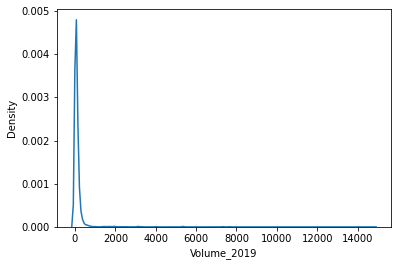

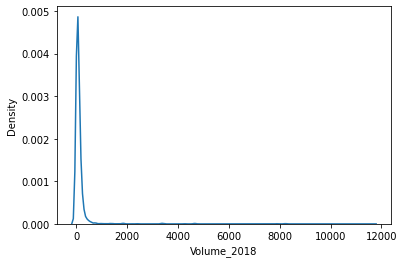

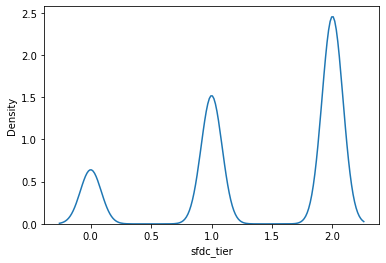

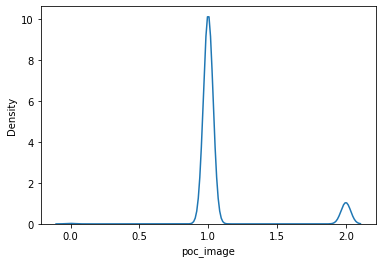

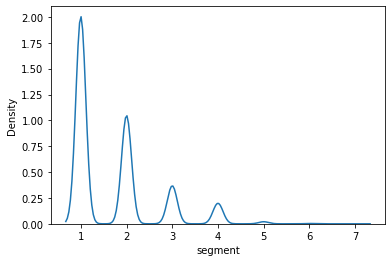

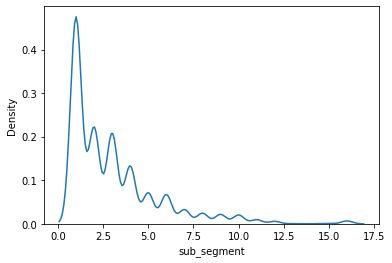

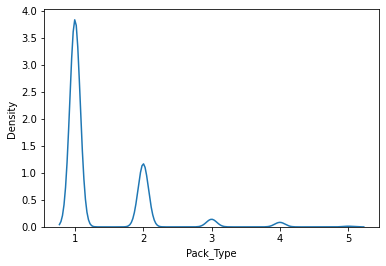

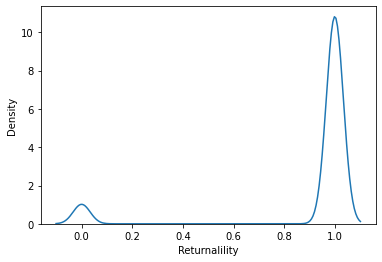

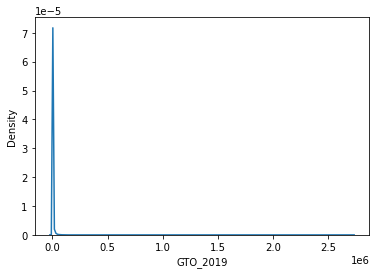

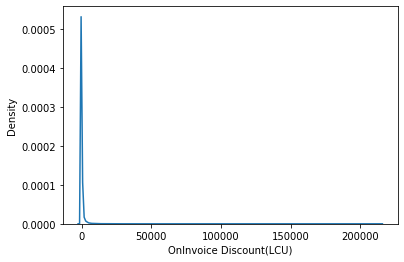

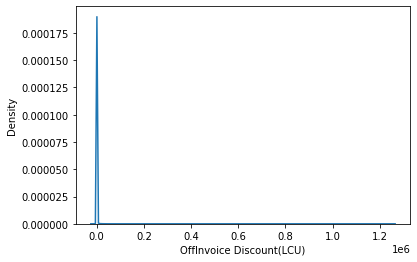

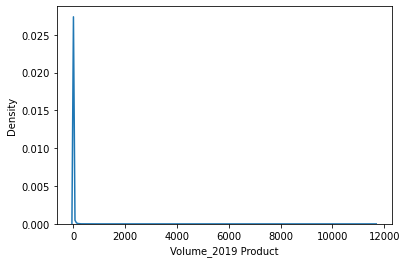

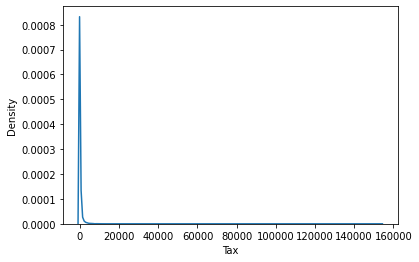

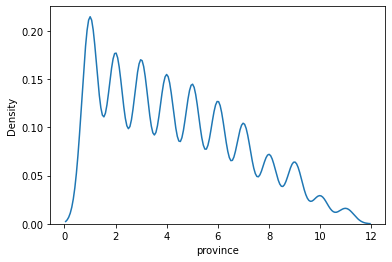

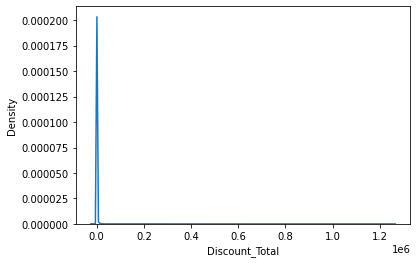

In [ ]:
for i in ['Volume_2019', 'Volume_2018', 'sfdc_tier', 'poc_image',
       'segment', 'sub_segment', 'Pack_Type', 'Returnalility', 'GTO_2019',
       'OnInvoice Discount(LCU)', 'OffInvoice Discount(LCU)',
       'Volume_2019 Product', 'Tax', 'province', 'Discount_Total']:
       sns.distplot(df[i],bins=1000,hist=False)
       plt.xlabel(i)
       plt.show()

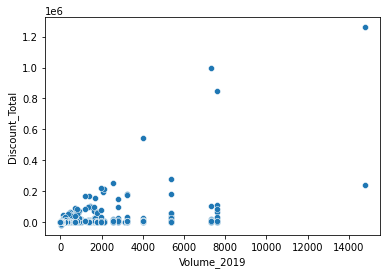

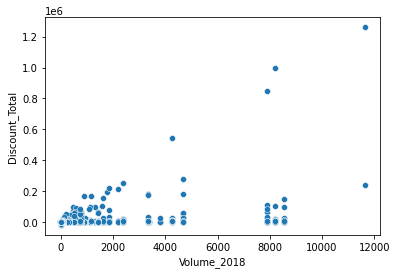

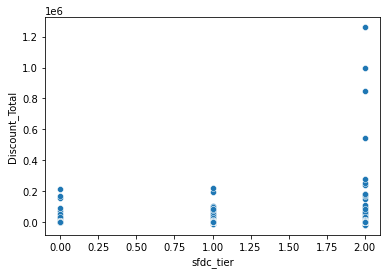

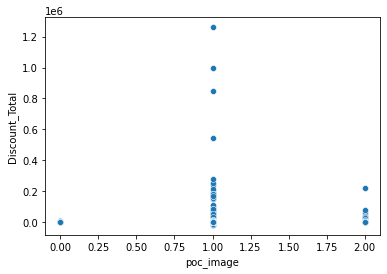

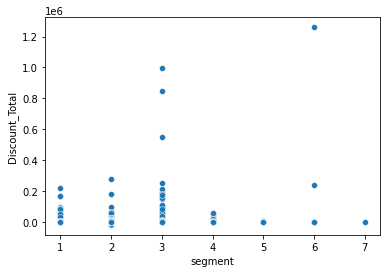

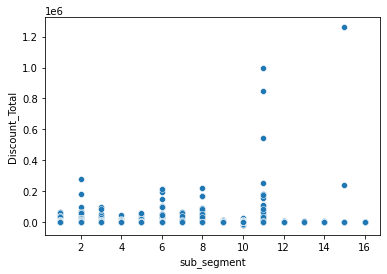

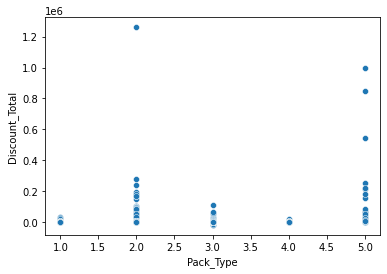

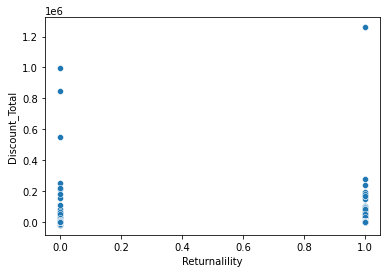

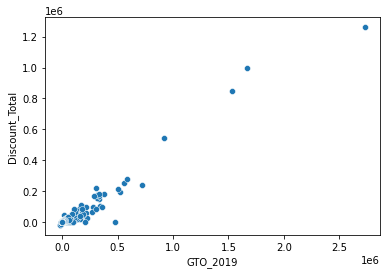

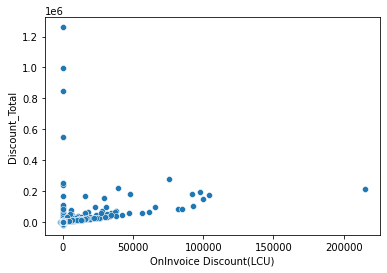

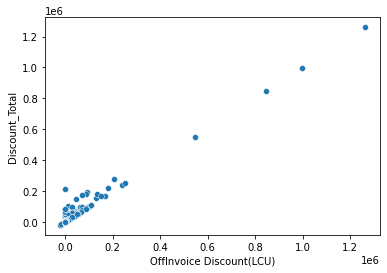

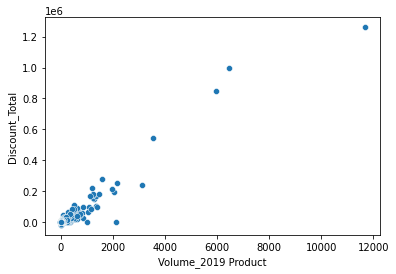

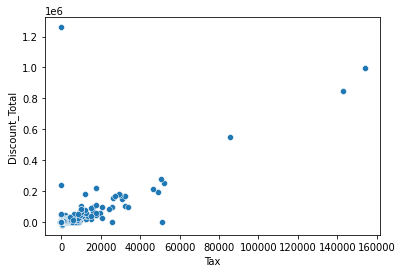

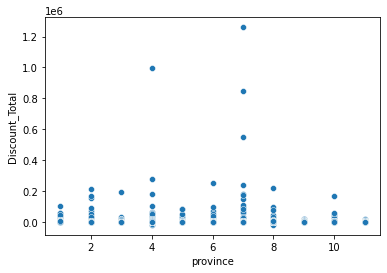

In [ ]:
for i in ['Volume_2019', 'Volume_2018', 'sfdc_tier', 'poc_image',
       'segment', 'sub_segment', 'Pack_Type', 'Returnalility', 'GTO_2019',
       'OnInvoice Discount(LCU)', 'OffInvoice Discount(LCU)',
       'Volume_2019 Product', 'Tax', 'province']:
       sns.scatterplot(df[i],df["Discount_Total"])
       plt.xlabel(i)
       plt.show()

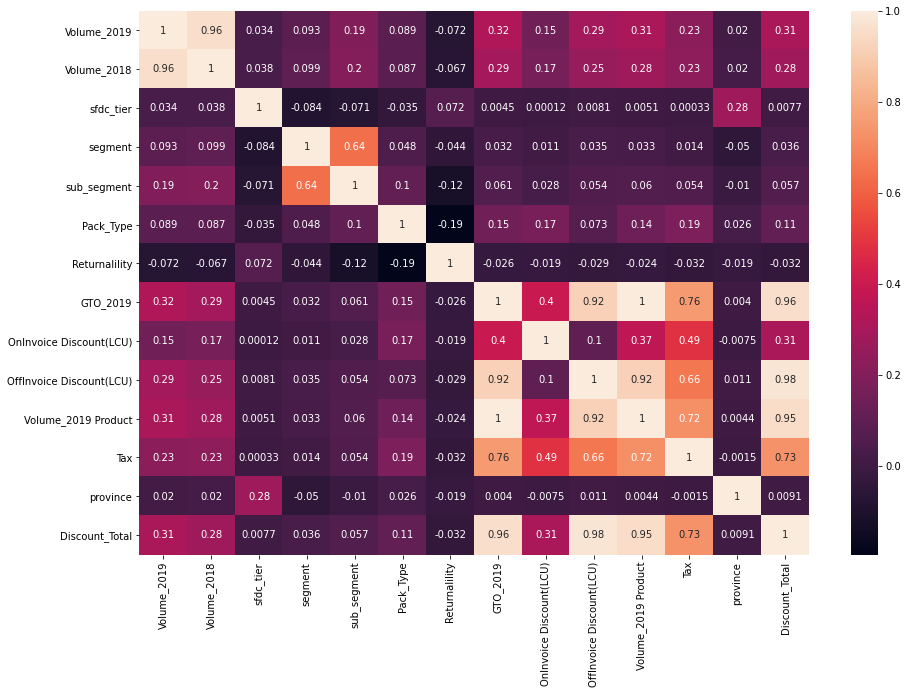

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor="white")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
reg1 = GradientBoostingRegressor()
reg2 = RandomForestRegressor()
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(x_train,y_train)
y_pred = ereg.predict(x_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("mae error: ",mean_absolute_error(y_test,y_pred))
print("rmse:",sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9748567764452042
mae error:  54.66308664096658
rmse: 1552.871951443765


In [ ]:
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("mae error: ",mean_absolute_error(y_test,y_pred))
print("rmse:",sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9156843101967419
mae error:  104.57011906745393
rmse: 2843.671110636053


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

pca = PCA(n_components = df.shape[1])
pca_data = pca.fit_transform(df)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

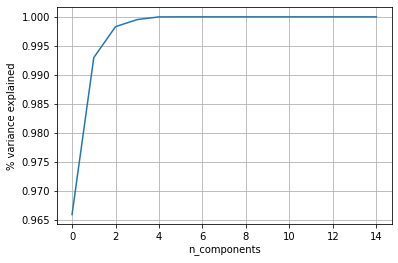

In [ ]:
plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

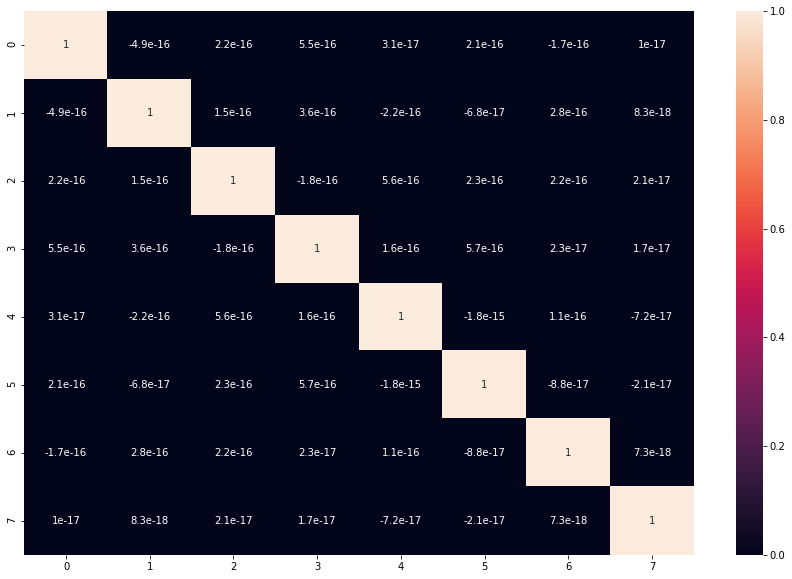

In [ ]:
pca = PCA(n_components=8)
pca_train_data = pca.fit_transform(df)
df_train_pca = pd.DataFrame(pca_train_data)
plt.figure(figsize=(15,10))
sns.heatmap(df_train_pca.corr(),annot=True,linecolor="white")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

X=df.drop(columns=["Discount_Total"])
y=df["Discount_Total"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
ereg.fit(x_train,y_train)
y_pred = ereg.predict(x_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("mae error: ",mean_absolute_error(y_test,y_pred))
print("rmse:",sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9746769359333546
mae error:  54.51662097046222
rmse: 1558.4156257774544


In [ ]:
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("mae error: ",mean_absolute_error(y_test,y_pred))
print("rmse:",sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9018175484511507
mae error:  108.07653826924633
rmse: 3068.612877229286
